# Unsupervised Learning: Clustering, Dimensionality Reduction, and Advanced Techniques

##Unsupervised Learning

###K-means clustering

####Market Segmentation with K-means

In this example, we will use the K-Means algorithm to segment customers of a wholesale distributor based on their spending habits on various product categories. We will be using the "Wholesale customers data" dataset from the UCI Machine Learning Repository.

In [ ]:
%%capture
!pip install pandas numpy matplotlib scikit-learn urllib

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #data visualization
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler #standardizing features
from sklearn.decomposition import PCA #dimensionality reduction
from urllib.request import urlretrieve #to download the dataset from repository

In [ ]:
# Download the dataset from UCI Machine Learning Repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
urlretrieve(url, 'wholesale_customers.csv')

('wholesale_customers.csv', <http.client.HTTPMessage at 0x7fa974758fd0>)

In [ ]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('wholesale_customers.csv')

In [ ]:
# Drop the Channel and Region columns because they are not required for clustering task
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [ ]:
# Scale the features to ensure all features contribute equally to the model
scaler = StandardScaler() #standardize features to have a mean of 0 and standard deviation of 1
X = scaler.fit_transform(df)

In [ ]:
# Reduce the dimensionality  to 2 with PCA  for visualization (makes it possible to visualize the clusters in 2D plot)
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
# Fit the K-Means model and predict the clusters
kmeans = KMeans(n_clusters=5, random_state=42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


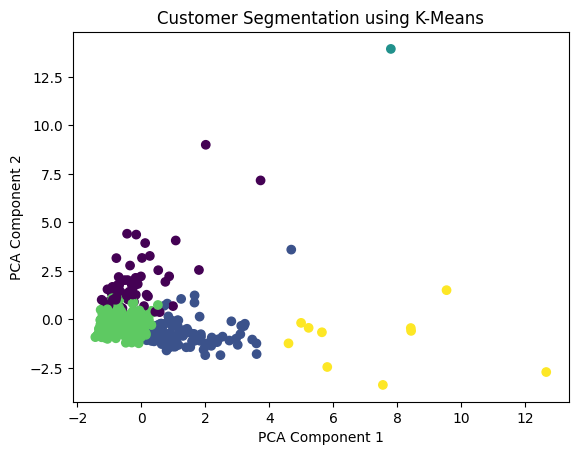

In [ ]:
# Plot the clusters, color of each point represents the cluster the point belongs to
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_kmeans, cmap='viridis')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

###EM clustering

####Anomaly Detection using EM clustering

In this example, we will use the Expectation-Maximization (EM) algorithm to detect anomalies in a dataset of credit card transactions.
We will be using the "Credit Card Fraud Detection" dataset from Kaggle.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from urllib.request import urlretrieve

In [ ]:
# Download the dataset from Kaggle
url = 'https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv'
urlretrieve(url, 'creditcard.csv')

('creditcard.csv', <http.client.HTTPMessage at 0x7fa96d9e9750>)

In [ ]:
# Load the dataset into a pandas dataframe
df = pd.read_csv('creditcard.csv')

In [ ]:
# Drop the Time column and normalize the Amount column
df.drop(['Time'], axis=1, inplace=True) #dropped as it is not required for the anomaly detection task
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1)) #Amount column is standardized

In [ ]:
# Fit the EM model and predict the clusters
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42) #
y_gmm = gmm.fit_predict(df) #

In [ ]:
# Identify the anomalous samples
#score method used to compute the weighted log probabilities for each sample
threshold = np.percentile(gmm.score_samples(df), 1)
anomalies = df[gmm.score_samples(df) < threshold]

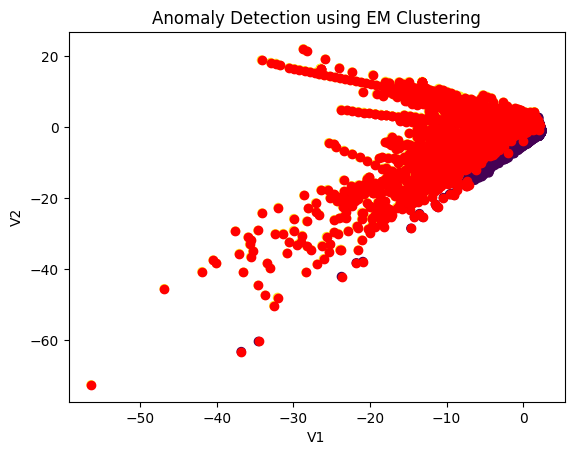

In [ ]:
# Plot the anomalies
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_gmm, cmap='viridis')
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], color='red') #
plt.title('Anomaly Detection using EM Clustering')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

###Principal Component Analysis

####Image Compression

The first example demonstrates how to use PCA for image compression. The example downloads the Olivetti faces dataset, which contains grayscale images of 40 individuals, each with 10 images taken at different times. The images are 64x64 pixels in size.

In [ ]:
from google.colab import drive # connecting to google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install imageio

In [ ]:
# Import necessary libraries
import imageio # for reading and writing images
import numpy as np #mathematical operations
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
# Load the sample image from the file path
img = imageio.v2.imread('/content/drive/MyDrive/lab/Presentations/AI_summer/data/image.jpg')

In [ ]:
# Rescale the image by dividing all of its pixel values by 255 which converts them into the range of 0-1
img = img / 255.0

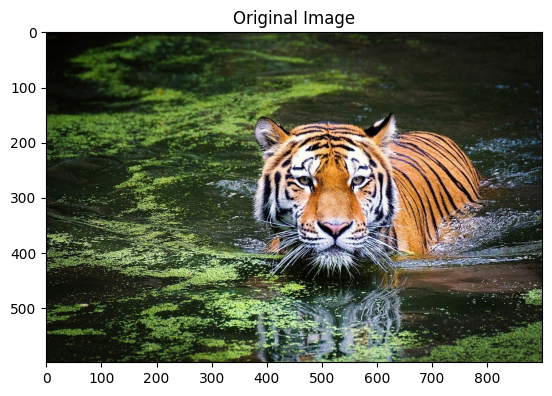

In [ ]:
# Plot the original image
plt.imshow(img) #display the original image
plt.title('Original Image')
plt.show()

In [ ]:
# Perform PCA on the image
pca = PCA(n_components=0.95) #
img_pca = pca.fit_transform(img.reshape(-1, 3)) #

In [ ]:
# Reconstruct the image from the PCA features
img_reconstructed = pca.inverse_transform(img_pca).reshape(img.shape)

In [ ]:
# Clip the values of the reconstructed image to the range [0, 1]
img_reconstructed = np.clip(img_reconstructed, 0, 1)

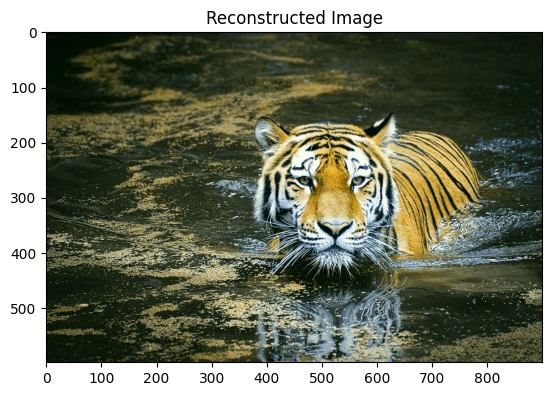

In [ ]:
 # Plot the reconstructed image
plt.imshow(img_reconstructed)
plt.title('Reconstructed Image')
plt.show()

###Association Rule Mining

####Market Basket Analysis

We'll use the "Online Retail" dataset available on the UCI Machine Learning Repository. The mlxtend library's Apriori algorithm will be used for association rule mining.

In [ ]:
!pip install mlxtend

In [ ]:
# Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# Load dataset
# Replace 'url' with the URL where the dataset is located
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

In [ ]:
# Clean the data by removing spaces in Description and dropping the rows without InvoiceNo
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [ ]:
# In the dataset, if the code starts with letter 'c', it indicates a cancellation.
# We need to remove these instances for this analysis
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
# Group the data by InvoiceNo and Description so we have a list of items bought together
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [ ]:
# Convert all positive values to 1 and everything else to 0
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [ ]:
# Use apriori to find the frequent itemsets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [ ]:
# Generate the association rules - these parameters can be adjusted as necessary
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [ ]:
# Print the rules
print(rules)

                                       antecedents  \
0                         (6 RIBBONS RUSTIC CHARM)   
1                         (JAM MAKING SET PRINTED)   
2                         (6 RIBBONS RUSTIC CHARM)   
3                       (JAM MAKING SET WITH JARS)   
4                         (6 RIBBONS RUSTIC CHARM)   
...                                            ...   
2811  (LUNCH BAG SUKI DESIGN, LUNCH BAG CARS BLUE)   
2812                     (LUNCH BAG RED RETROSPOT)   
2813                     (LUNCH BAG  BLACK SKULL.)   
2814                         (LUNCH BAG CARS BLUE)   
2815                       (LUNCH BAG SUKI DESIGN)   

                                            consequents  antecedent support  \
0                              (JAM MAKING SET PRINTED)            0.046339   
1                              (6 RIBBONS RUSTIC CHARM)            0.056383   
2                            (JAM MAKING SET WITH JARS)            0.046339   
3                              (6 R

###Topic Modeling

We'll use the "20 Newsgroups" dataset available in sklearn. For topic modeling, we'll use the Latent Dirichlet Allocation (LDA) method available in the gensim library.

####Discovering Themes in Texts

In [ ]:
# Import required libraries
from sklearn.datasets import fetch_20newsgroups
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Load the dataset
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [ ]:
# Get the texts
texts = dataset.data

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Define a list of stopwords to remove from the texts
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [ ]:
from nltk import word_tokenize

In [ ]:
# Process the texts
processed_texts = []
for text in texts:
    current_text = []
    for word in word_tokenize(text):
        if word not in stop_words and word.isalpha():
            current_text.append(word.lower())
    processed_texts.append(current_text)

In [ ]:
# Create the dictionary and the corpus needed for LDA
dictionary = Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

In [ ]:
# Apply the LDA model
lda_model = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [ ]:
# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.043*"i" + 0.010*"the" + 0.010*"would" + 0.006*"one" + 0.006*"people" + 0.005*"it" + 0.005*"like" + 0.004*"and" + 0.004*"know" + 0.004*"said"
Topic: 1 
Words: 0.028*"i" + 0.009*"the" + 0.007*"game" + 0.007*"team" + 0.006*"year" + 0.005*"would" + 0.005*"games" + 0.005*"play" + 0.005*"one" + 0.005*"good"
Topic: 2 
Words: 0.019*"i" + 0.012*"the" + 0.009*"one" + 0.007*"people" + 0.007*"would" + 0.005*"it" + 0.005*"if" + 0.004*"key" + 0.004*"what" + 0.004*"this"
Topic: 3 
Words: 0.068*"i" + 0.008*"one" + 0.007*"would" + 0.007*"the" + 0.007*"like" + 0.006*"windows" + 0.006*"get" + 0.006*"thanks" + 0.006*"know" + 0.006*"if"
Topic: 4 
Words: 0.028*"i" + 0.011*"q" + 0.007*"one" + 0.006*"think" + 0.005*"church" + 0.005*"god" + 0.005*"believe" + 0.004*"science" + 0.004*"christianity" + 0.004*"christians"
Topic: 5 
Words: 0.026*"x" + 0.016*"the" + 0.016*"i" + 0.007*"file" + 0.005*"program" + 0.004*"this" + 0.004*"available" + 0.004*"information" + 0.004*"window" + 0.004*"it"
Topi

###Density Estimation

####Understanding Data Distributions

For density estimation, we'll use the Iris dataset available in Scikit-learn. We'll use the Gaussian Kernel Density Estimator in Scikit-learn.

In [ ]:
# Import required libraries
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris['data'][:, 2]  # we only take the first feature (petal length).

In [ ]:
# Reshape the data
X = X.reshape(-1, 1)

In [ ]:
# Create a 1D KDE instance
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)

In [ ]:
# Fit the data
kde.fit(X)

KernelDensity(bandwidth=0.2)

In [ ]:
# Sample 1000 points from the range of X
X_plot = np.linspace(X.min(), X.max(), 1000)[:, np.newaxis]

In [ ]:
# Compute the density for these points
density = np.exp(kde.score_samples(X_plot))

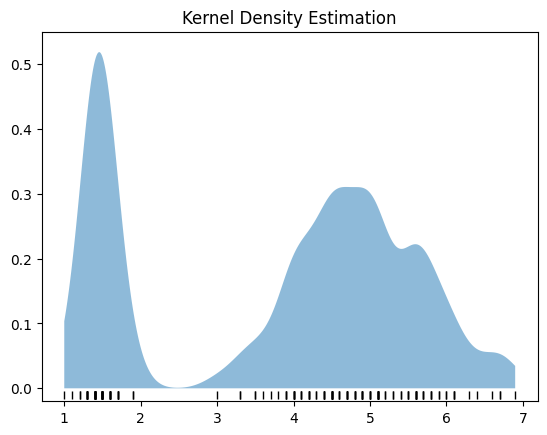

In [ ]:
# Plot the data
plt.fill_between(X_plot[:, 0], density, alpha=0.5)
plt.plot(X, np.full(X.shape, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.55)
plt.title("Kernel Density Estimation")
plt.show()

##Data Preprocessing

####Loading the data

The first step in any data preprocessing pipeline, load data into the environment for processing.

In [ ]:
import pandas as pd
df = pd.read_csv('data.csv')  # Reading data from CSV

####Understanding the data

 Understand the structure of the data, number of features, data types etc.

In [ ]:
df.shape  # Prints the shape of data (Rows, Columns)
df.columns  # Prints the column names
df.info()  # Provides a concise summary of the dataframe

####Removing duplicates

 Duplicate rows may skew the analysis or training of a machine learning model.

In [ ]:
df = df.drop_duplicates()

####Renaming columns

For clearer, more meaningful column names and easier data handling.

In [ ]:
df = df.rename(columns={'old_name': 'new_name'})

####Checking for missing data

Missing data can lead to inaccurate analysis or model training.

In [ ]:
df.isnull().sum()

####Imputing missing data

Handles missing data, either by deleting the row/column or filling it with a specific value.

In [ ]:
df = df.fillna(value)  # 'value' can be a statistic like mean, median etc. or just a custom value

####Converting data types

Ensures correct data types are used for each column for efficient processing and accurate results.

In [ ]:
df['column_name'] = df['column_name'].astype('int')  # Converting to integer

####One-hot encoding

Converts categorical variables into a form that could be provided to ML algorithms to improve prediction.

In [ ]:
df = pd.get_dummies(df, columns=['column_name'])

####Label encoding

Transforms non-numerical labels into numerical labels (also known as integer encoding).

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['column_name'] = le.fit_transform(df['column_name'])

####Splitting the data

Provides data that the models can learn from (training set) and data that is used to evaluate the model (testing set).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####Feature Scaling

Standardizes the range of independent variables or features of data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

####Handling outliers

Outliers can significantly affect the results of data analysis and statistical modeling.

In [ ]:
# IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

####Data binning

Reduces the effects of minor observation errors or reduces the impact of noisy data points.

In [ ]:
bins = [0, 18, 60, np.inf]
names = ['<18', '18-60', '60+']
df['AgeRange'] = pd.cut(df['Age'], bins, labels=names)

###Log transformation

Helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

In [ ]:
df['column_name'] = df['column_name'].apply(lambda x: np.log(x+1))

###Normalization

Changes the values of numeric columns in the dataset to a common scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['column_name'] = scaler.fit_transform(df[['column_name']])

###Removing irrelevant features

Helps to remove unnecessary data and reduce dimensionality.

In [ ]:
df = df.drop(['column1', 'column2'], axis=1)

###Stratified split

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds.

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["column_name"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

###Data augmentation

In deep learning, this technique can create variations of the images, so the model sees more diversified, but still consistent, images during training.

In [ ]:
# In image data
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2)

###Creating interaction features

Sometimes, combining two features can provide information that is more valuable than the sum of its parts.

In [ ]:
df['new_feature'] = df['feature1'] * df['feature2']

###Balancing classes

Solves the issue of imbalanced datasets, improving the performance of the classifier by balancing the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

##Data Normalization

Data normalization is a crucial step in data preprocessing to ensure that numerical data on different scales can be used meaningfully for machine learning algorithms. Different techniques of data normalization are suitable for different types of problems.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.stats import boxcox, yeojohnson

# Create a simple data array
data = np.array([[1, 200], [2, 800], [3, 900], [4, 500], [5, 300]], dtype=np.float64)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

###Min-Max Normalization (Rescaling)

The simplest method, it scales all data in the range [0,1]. The formula is (x - min) / (max - min). This is useful when the data does not follow a Gaussian distribution.

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)
print(df_minmax)

###Z-score Normalization (Standardization)

This technique standardizes the data to have a mean of 0 and standard deviation of 1. It follows the formula (x - mean) / std_dev. This is useful when data follows a Gaussian distribution (or it's assumed to be Gaussian).

In [ ]:
standard_scaler = preprocessing.StandardScaler()
df_standard = standard_scaler.fit_transform(df)
print(df_standard)

###Decimal Scaling

This involves moving the decimal point of values of the dataset. The transformation is dependent on the maximum absolute value in the dataset.

In [ ]:
decimal_scaler = preprocessing.MaxAbsScaler()
df_decimal = decimal_scaler.fit_transform(df)
print(df_decimal)

###Logarithmic Transformation

 Used to reduce the skewness of the dataset. The new values are the corresponding logarithmic values of the original attribute. It's often used when the rate of change of a value increases or decreases exponentially.

In [ ]:
df_log = np.log(df)
print(df_log)

###Square Root Transformation

This is another technique used for reducing skewness, especially when dealing with large values. The transformed value is the square root of the original attribute value.

In [ ]:
df_sqrt = np.sqrt(df)
print(df_sqrt)

###Box-Cox Transformation

This is a powerful family of data transformation methods that can handle a variety of skewness. It calculates the best power transformation of the data that reduces skewness to a manageable level.

In [ ]:
# Adding small constant to avoid zero values
df_boxcox, _ = boxcox(df['Feature2'] + 1e-5)
print(df_boxcox)

###Yeo-Johnson Transformation

An extension of the Box-Cox transformation that can be used with data that contains zero or negative values.

In [ ]:
df_yeojohnson, _ = yeojohnson(df['Feature2'])
print(df_yeojohnson)

###Quantile Normalization

Also known as rank normalization. This technique sorts the data in ascending order and then assigns a rank to individual data points. It is mainly used in preparing data for machine learning algorithms.

In [ ]:
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal', random_state=0)
df_quantile = quantile_transformer.fit_transform(df)
print(df_quantile)

###Unit Vector Transformation (Feature Scaling)

This technique divides each value of a feature by the Euclidean length of the feature vector, resulting in each feature having a length of 1, i.e., it resides on the unit circle.

In [ ]:
normalizer = preprocessing.Normalizer()
df_normalized = normalizer.fit_transform(df)
print(df_normalized)